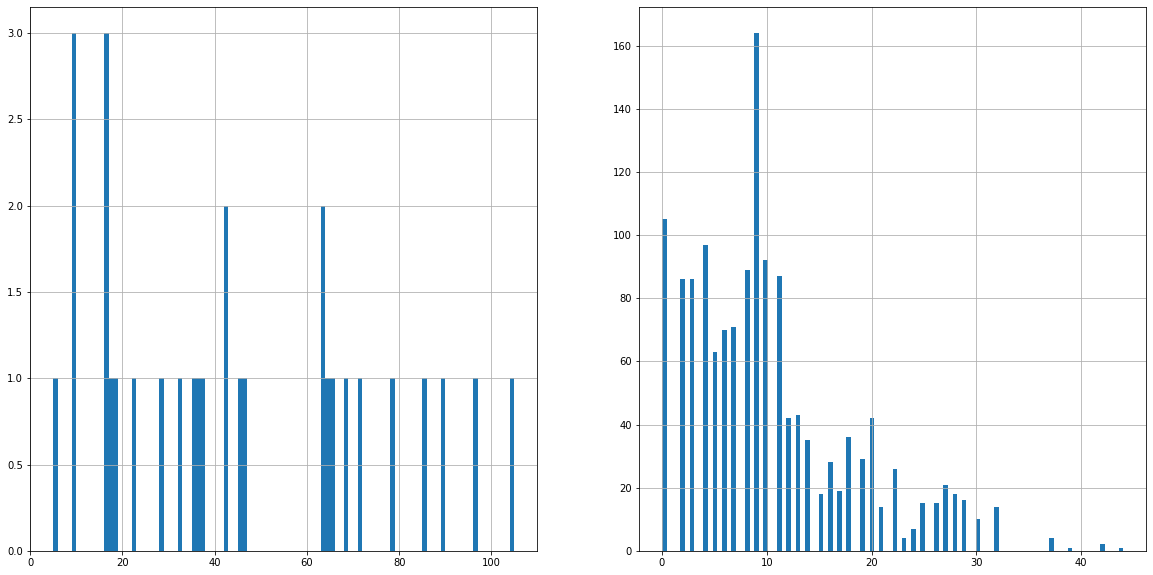

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
import numpy as np

# pd = pd.read_csv("output_data/parameter_frame.csv")
# pd = pd.read_csv("output_data/output_df30.csv")
pd = pd.read_csv("output_df.csv")

# extract params into columns
pd["Params"] = pd["Params"].apply(literal_eval)
pd["Int_T"] = [i[0] for i in pd["Params"]]
pd["Timeout"] = [i[1] for i in pd["Params"]]

# Remote Max
fig, ax = plt.subplots(1, 2, figsize=(20,10))
asic0 = pd[(pd["AsicX"] == 0) & (pd["AsicY"] == 0)]
asic_other = pd[(pd["AsicX"] != 0) & (pd["AsicY"] != 0)]

h1 = asic0["Remote Max"].hist(ax=ax[0], bins=100)
h2 = asic_other["Remote Max"].hist(ax=ax[1], bins=100)


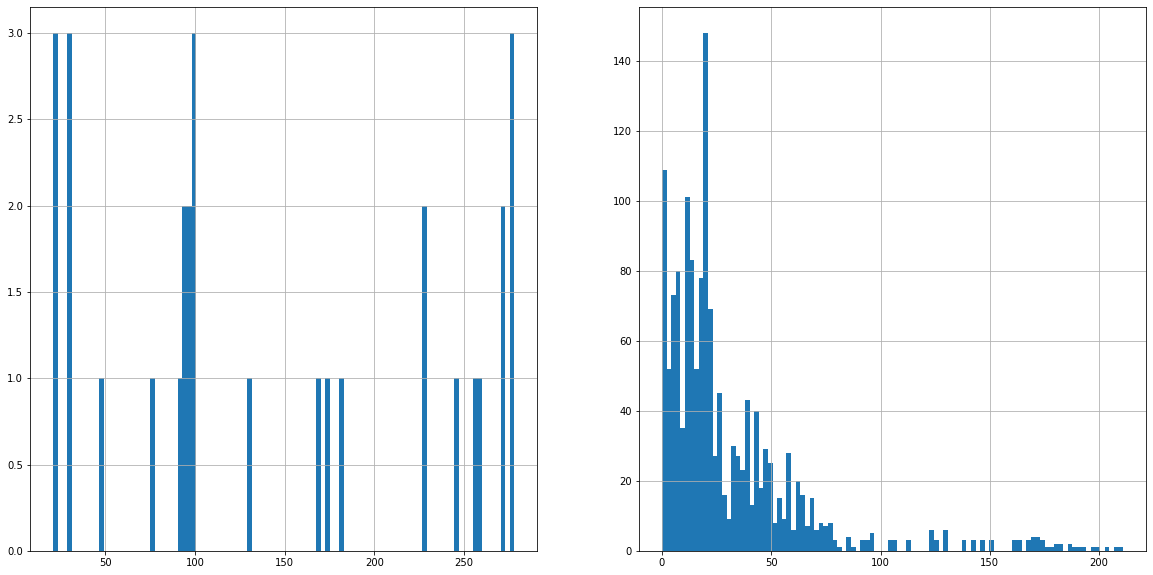

In [2]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
asic0 = pd[(pd["AsicX"] == 0) & (pd["AsicY"] == 0)]
asic_other = pd[(pd["AsicX"] != 0) & (pd["AsicY"] != 0)]

h1 = asic0["Remote Transactions"].hist(ax=ax[0], bins=100)
h2 = asic_other["Remote Transactions"].hist(ax=ax[1], bins=100)

In [4]:
val = 0b1010_1010_1010_1010_1010_1010_1010_1010
nval = 0b0101_0101_0101_0101_0101_0101_0101_0101
max = 0xffff_ffff
print((val - nval)/max)

0.3333333333333333


{1500000.0, 150000.0, 15000.0}
{0.75, 1.0, 2.0, 0.2, 0.5}


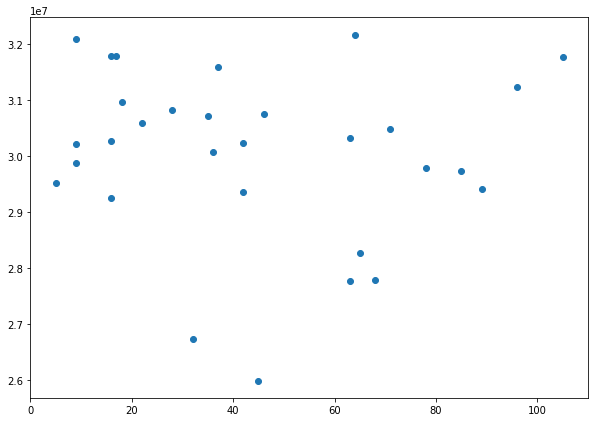

In [3]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,7))
# TODO different colors, different intervals
typs = ["Frq", "Timeout", "Int_T"]
min_t = min(set(pd["Timeout"].values))
max_t = max(set(pd["Timeout"].values))
min_i = min(set(pd["Int_T"].values))
max_i = max(set(pd["Int_T"].values))
ax.scatter(asic0["Remote Max"].values, asic0["Frq"].values)
print(set(pd["Timeout"].values))
print(set(pd["Int_T"].values))

{0.75, 1.0, 2.0, 0.2, 0.5}


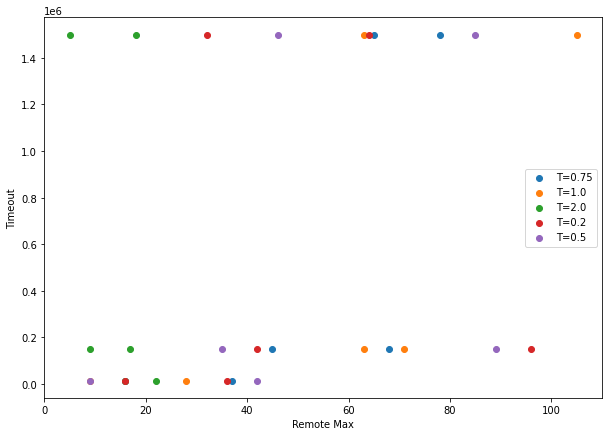

In [4]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,7))
# ax.scatter(asic0["Remote Max"].values, asic0["Timeout"].values)
int_times = set(asic0["Int_T"].values)
print(int_times)
for i in int_times:
    df = asic0[asic0["Int_T"] == i]
    x = df["Remote Max"]
    y = df["Timeout"]
    ax.scatter(x, y, label=f"T={i}")
    ax.set_xlabel("Remote Max")
    ax.set_ylabel("Timeout")
ax.legend()

{1500000.0, 150000.0, 15000.0}


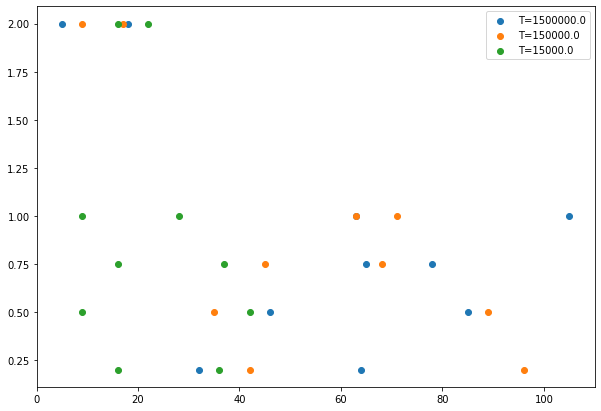

In [5]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,7))
times_outs = set(asic0["Timeout"].values)
print(times_outs)
for i in times_outs:
    df = asic0[asic0["Timeout"] == i]
    x = df["Remote Max"]
    y = df["Int_T"]
    sh = df["Route"]
    # m = ['o' if r == 'snake' else '.' for r in sh]
    # ax.scatter(x, y, marker=m, label=f"T={i}")
    ax.scatter(x, y, label=f"T={i}")
ax.legend()